In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Hugo's Portfolio/Realized Volatility Predictability through Neural Network and Financial Turbulence Research/New Version/Model 1/S&P 500 Realized Volatility.xlsx",index_col='Date',parse_dates=True)

In [ ]:
df.drop(columns=["S&P 500 Financial Turbulence"], inplace=True)
df.head()

,Realised
Date,
2017-11-02,0.004873
2017-11-03,0.003036
2017-11-06,0.001808
2017-11-07,0.003225
2017-11-08,0.002568


# Hyperparameter search

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
scaler = MinMaxScaler()

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[3,5,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

In [ ]:
from numpy.random import seed
from random import randrange

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 1
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
21/21 [==============================] - 8s 10ms/step - loss: 0.0077 - acc: 0.0015
Epoch 2/3
21/21 [==============================] - 0s 10ms/step - loss: 0.0049 - acc: 0.0015
Epoch 3/3
1/1 [==============================] - 0s 19ms/step
Epoch: 3 | Inputs: 84 | Nodes: 126 | Dropout: 0 | Loss: mse
RMSE: 0.0027119325264473512 | Accuracy: 46.42187922560021
Epoch 1/15
21/21 [==============================] - 4s 13ms/step - loss: 0.0515 - acc: 0.0015
Epoch 2/15
21/21 [==============================] - 0s 11ms/step - loss: 0.0402 - acc: 0.0015
Epoch 3/15
21/21 [==============================] - 0s 15ms/step - loss: 0.0390 - acc: 0.0015
Epoch 4/15
21/21 [==============================] - 0s 11ms/step - loss: 0.0373 - acc: 0.0015
Epoch 5/15
21/21 [==============================] - 0s 12ms/step - loss: 0.0366 - acc: 0.0015
Epoch 6/15
21/21 [==============================] - 0s 13ms/step - loss: 0.0370 - acc: 0.0015
Epoch 7/15
21/21 [==============================] - 0s 17ms/step - los

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 1
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
21/21 [==============================] - 5s 11ms/step - loss: 0.0041 - acc: 0.0015
Epoch 2/3
21/21 [==============================] - 0s 13ms/step - loss: 0.0027 - acc: 0.0015
Epoch 3/3
1/1 [==============================] - 0s 85ms/step
Epoch: 3 | Inputs: 84 | Nodes: 84 | Dropout: 0.4 | Loss: huber_loss
RMSE: 0.0026983594948958587 | Accuracy: 47.87851569798961
Epoch 1/10
18/18 [==============================] - 4s 18ms/step - loss: 0.0072 - acc: 0.0018
Epoch 2/10
18/18 [==============================] - 0s 14ms/step - loss: 0.0050 - acc: 0.0018
Epoch 3/10
18/18 [==============================] - 0s 13ms/step - loss: 0.0044 - acc: 0.0018
Epoch 4/10
18/18 [==============================] - 0s 13ms/step - loss: 0.0041 - acc: 0.0018
Epoch 5/10
18/18 [==============================] - 0s 13ms/step - loss: 0.0043 - acc: 0.0018
Epoch 6/10
18/18 [==============================] - 0s 18ms/step - loss: 0.0040 - acc: 0.0018
Epoch 7/10
18/18 [==============================] - 1s 28ms/st

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 1
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
23/23 [==============================] - 3s 5ms/step - loss: 0.0056 - acc: 0.0014
Epoch 2/15
23/23 [==============================] - 0s 5ms/step - loss: 0.0045 - acc: 0.0014
Epoch 3/15
23/23 [==============================] - 0s 5ms/step - loss: 0.0039 - acc: 0.0014
Epoch 4/15
23/23 [==============================] - 0s 5ms/step - loss: 0.0040 - acc: 0.0014
Epoch 5/15
23/23 [==============================] - 0s 5ms/step - loss: 0.0036 - acc: 0.0014
Epoch 6/15
23/23 [==============================] - 0s 5ms/step - loss: 0.0039 - acc: 0.0014
Epoch 7/15
23/23 [==============================] - 0s 6ms/step - loss: 0.0039 - acc: 0.0014
Epoch 8/15
23/23 [==============================] - 0s 5ms/step - loss: 0.0039 - acc: 0.0014
Epoch 9/15
23/23 [==============================] - 0s 5ms/step - loss: 0.0036 - acc: 0.0014
Epoch 10/15
23/23 [==============================] - 0s 5ms/step - loss: 0.0038 - acc: 0.0014
Epoch 11/15
23/23 [==============================] - 0s 5ms/step - lo

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 1
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
21/21 [==============================] - 2s 9ms/step - loss: 0.0503 - acc: 0.0015
Epoch 2/3
21/21 [==============================] - 0s 8ms/step - loss: 0.0391 - acc: 0.0015
Epoch 3/3
1/1 [==============================] - 0s 24ms/step
Epoch: 3 | Inputs: 84 | Nodes: 56 | Dropout: 0 | Loss: mae
RMSE: 0.0024512277332602024 | Accuracy: 58.406182684692645
Epoch 1/10
23/23 [==============================] - 2s 5ms/step - loss: 0.0043 - acc: 0.0014
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0037 - acc: 0.0014
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.0034 - acc: 0.0014
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0027 - acc: 0.0014
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.0025 - acc: 0.0014
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0026 - acc: 0.0014
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0026

Epoch: 15 | Inputs: 252 | Nodes: 56 | Dropout: 0.4 | Loss: mae
RMSE: 0.0024065327934559956 | Accuracy: 60.721384818620635

In [ ]:
RMSE = []
Accuracy = []

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.8)]
test = df.iloc[int(len(df['Realised'])*0.8):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.8)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 1
n_input = 252
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=15)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)

Epoch 1/15
24/24 [==============================] - 3s 15ms/step - loss: 0.0575 - accuracy: 0.0013 - mean_absolute_error: 0.0575
Epoch 2/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0440 - accuracy: 0.0013 - mean_absolute_error: 0.0440
Epoch 3/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0405 - accuracy: 0.0013 - mean_absolute_error: 0.0405
Epoch 4/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.0013 - mean_absolute_error: 0.0397
Epoch 5/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0385 - accuracy: 0.0013 - mean_absolute_error: 0.0385
Epoch 6/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0386 - accuracy: 0.0013 - mean_absolute_error: 0.0386
Epoch 7/15
24/24 [==============================] - 0s 9ms/step - loss: 0.0380 - accuracy: 0.0013 - mean_absolute_error: 0.0380
Epoch 8/15
24/24 [==============================] - 0s 13ms/step - loss: 0.0398 - accuracy: 0.0013

In [ ]:
RMSE

[0.0033338725854676057,
 0.00352916028911246,
 0.0033166760570272047,
 0.003460105377342677,
 0.0033367996966322875,
 0.0033410326712657694,
 0.003338500065176483,
 0.0034121803583029237,
 0.0032831743238334694,
 0.003505387814644715]

In [ ]:
Accuracy

[69.6526315911478,
 70.11749180711702,
 70.13258742750675,
 70.23122873840728,
 69.85036164280946,
 70.16358679884588,
 70.44435218069648,
 70.16739784037497,
 70.15766943519063,
 70.10659993718164]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.8):].reset_index()

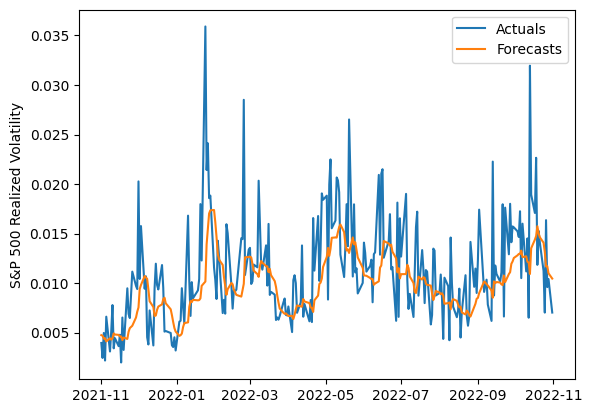

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

In [ ]:
forecasts=true_predictions

In [ ]:
my_df = {'Forecasts': forecasts.reshape(252)}
df = pd.DataFrame(my_df)
df.to_csv('Model 1 Forecasts.csv', index = True)
